In [33]:
#det her er den udgave med det cleanede data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = np.load("tfidf")

In [8]:
def bin_target(x):
    if x=="reliable":
        return 0
    if x=="fake":
        return 1

y = data["simple_type"].apply(lambda x:bin_target(x)).astype(int)

X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5,random_state=0,shuffle=True) 


In [ ]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(20,20), max_iter=1,verbose=True,tol=0.1,n_iter_no_change=2).fit(X_train, y_train)
clf.score(X_val,y_val)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = MLPClassifier(random_state=1, max_iter=1,tol=0.01,n_iter_no_change=3,early_stopping=True)
distributions = dict("hidden_layer_sizes"=[(50,50,50),(20,20,20,20,20),(100,)(50,)],"activation"="‘identity’, ‘logistic’, ‘tanh’, ‘relu’")
clf = RandomizedSearchCV(model, distributions, random_state=1)
search = clf.fit(X_train, y_train)
search.best_params_


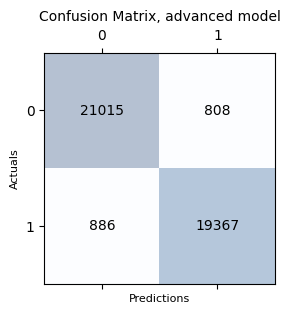

In [45]:
#evaluation
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_true=y_val,y_pred=y_pred)

fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(2):
    for j in range(2):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='medium')
 
plt.xlabel('Predictions', fontsize=8)
plt.ylabel('Actuals', fontsize=8)
plt.title('Confusion Matrix, advanced model', fontsize=10)
plt.show()


In [46]:
print("accuracy:", accuracy_score(y_pred,y_val))
print("F1:", f1_score(y_pred,y_val))
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Precision:", precision)
print("Recall:", recall)

accuracy: 0.9597395189656811
F1: 0.9580983476798258
Precision: 0.9599504337050806
Recall: 0.9562533945588307


In [ ]:
model = MLPClassifier(random_state=1, max_iter=1,verbose=True,tol=0.01,n_iter_no_change=3,early_stopping=True)
clf = GridSearchCV(model,{"hidden_layer_sizes":((50,50,50),(20,20,20,20,20),(100,)(50,)),"activation":"‘identity’, ‘logistic’, ‘tanh’, ‘relu’"}, scoring='f1', cv=5)
clf.fit(X_train,y_train)